# **PUBG DATA ANALYSIS**

Problem Statement:-Predicting and Understanding the players game performance by using in game Statistics and using Models to predict the players accuracy and game rankings.

This is the Pubg Analysis which explores the game features and players preferences. A complete Preprocessing is done on the Data, Removed Outliers using IQR and dropped Null Values

We have two datasets which explains PUBG in different perspectives.The first one is the Aggregate data where columns are match_mode, party_size, player_assists, player_dbno, player_dist_ride, player_dist_walk, player_dmg, player_kills.

The another dataset we have is Kill Data which contains the players kill position, victim position, placement_rate, team_id, player_mode, game_size, party_size.

In [56]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# READING THE 1st DATASET OF AGGREGATE FILE
df1 = pd.read_csv("agg_match_stats_4.csv")

## > INFO ON THE DATASET

Explaining every column for Aggregate and the type of data it has:-

1.   **date**-Start time of the game- Nominal
2.   **game_size**-size of the game map-Discrete
3.    **match_id**	Event Unique ID	Nominal
4.    **match_mode**	Game Mode (First/Third Person View)	Nominal
5.    **party_size**	Squad size (1 person/2 people/4 people)	Discrete
6.    **player_assists**	Rescue teammates	Discrete
7.    **player_dbno**	Number of times the player was knocked down	Discrete
8.    **player_dist_ride**	Driving Distance	Continuous
9.    **player_dist_walk**	Walking distance	Continuous
10.   **player_dmg**	Injury points	Discrete
11.   **player_kills**	kills	Discrete
12.   **player_name**	Player Game id	Nominal
13.   **player_survive_time**	Player survival time	Continuous
14.   **team_id**	The player’s team number	Discrete
15.  **team_placement**	The final ranking of the player’s team	Discrete


In [58]:
df1.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,37.919838,20,0,m3xdave,106.351,100000,88
1,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,292.205048,3457.036130,387,3,UDaddyHere,1690.021,100006,8
2,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,106.215900,0,0,Dummy05,103.415,100010,89
3,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,126.959831,91,0,NA-Wuyifan,272.838,100019,67
4,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,43.346710,0,0,kickinchicken,134.342,100024,81


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   date                 1048575 non-null  object 
 1   game_size            1048575 non-null  int64  
 2   match_id             1048575 non-null  object 
 3   match_mode           1048575 non-null  object 
 4   party_size           1048575 non-null  int64  
 5   player_assists       1048575 non-null  int64  
 6   player_dbno          1048575 non-null  int64  
 7   player_dist_ride     1048575 non-null  float64
 8   player_dist_walk     1048575 non-null  float64
 9   player_dmg           1048575 non-null  int64  
 10  player_kills         1048575 non-null  int64  
 11  player_name          1047013 non-null  object 
 12  player_survive_time  1048575 non-null  float64
 13  team_id              1048575 non-null  int64  
 14  team_placement       1048575 non-null  int64  
dty

In [60]:
# CALCULATING THE TOTAL NULL VALUES
df1.isnull().sum()

date                      0
game_size                 0
match_id                  0
match_mode                0
party_size                0
player_assists            0
player_dbno               0
player_dist_ride          0
player_dist_walk          0
player_dmg                0
player_kills              0
player_name            1562
player_survive_time       0
team_id                   0
team_placement            0
dtype: int64

## > **DATA CLEANING (EDA)** FOR df1

In [61]:
# fill null values for game_size
df1.game_size.mean()
df1.game_size = df1.game_size.fillna(df1.game_size.mean())
# fill null values for match_mode
df1.match_mode.mode()
df1.match_mode = df1.match_mode.fillna("tpp")
# fill null values for party_size
df1.party_size.median()
df1.party_size = df1.party_size.fillna(df1.party_size.median())
# fill null values for player_assists
df1.player_assists.median()
df1.player_assists = df1.player_assists.fillna(df1.player_assists.median())
# fill null values for player_dbno
df1.player_dbno.median()
df1.player_dbno = df1.player_dbno.fillna(df1.player_dbno.median())
# fill null values for player_dist_ride
df1.player_dist_ride.median()
df1.player_dist_ride = df1.player_dist_ride.fillna(df1.player_dist_ride.median())
# fill null values for player_dist_walk
df1.player_dist_walk.mean()
df1.player_dist_walk = df1.player_dist_walk.fillna(df1.player_dist_walk.mean())
# fill null values for player_dmg
df1.player_dmg.median()
df1.player_dmg = df1.player_dmg.fillna(df1.player_dmg.median())
# fill null values for player_kills
df1.player_kills.median()
df1.player_kills = df1.player_kills.fillna(df1.player_kills.median())
# fill null values for player_survive_time
df1.player_survive_time.median()
df1.player_survive_time = df1.player_survive_time.fillna(df1.player_survive_time.median())
# fill null values for team_id
df1.team_id.mode()
df1.team_id = df1.team_id.fillna(12.0)
# fill null values for team_placement
df1.team_placement.median()
df1.team_placement = df1.team_placement.fillna(df1.team_placement.median())

In [62]:
# REVIEWING THE TOTAL NULL VALUES
df1.isna().sum()

date                      0
game_size                 0
match_id                  0
match_mode                0
party_size                0
player_assists            0
player_dbno               0
player_dist_ride          0
player_dist_walk          0
player_dmg                0
player_kills              0
player_name            1562
player_survive_time       0
team_id                   0
team_placement            0
dtype: int64

In [63]:
df1.describe()

,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,team_placement
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.754494e+01,2.713937e+00,2.280323e-01,5.777851e-01,1.152609e+03,1.289194e+03,1.237536e+02,8.871316e-01,7.861469e+02,2.153949e+04,2.465682e+01
std,2.543995e+01,1.250436e+00,5.726364e-01,1.114300e+00,1.981134e+03,4.623119e+03,1.691688e+02,1.553771e+00,5.764042e+02,4.110439e+04,2.056017e+01
min,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.497900e+01,1.000000e+00,1.000000e+00
25%,2.700000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.094233e+02,0.000000e+00,0.000000e+00,2.463550e+02,1.100000e+01,1.000000e+01
50%,4.400000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.489874e+02,7.700000e+01,0.000000e+00,6.516790e+02,2.200000e+01,2.000000e+01
75%,5.000000e+01,4.000000e+00,0.000000e+00,1.000000e+00,1.894528e+03,2.061103e+03,1.740000e+02,1.000000e+00,1.300215e+03,4.500000e+01,3.300000e+01
max,1.000000e+02,4.000000e+00,9.000000e+00,4.100000e+01,2.876271e+05,1.110722e+06,5.330000e+03,5.200000e+01,2.285010e+03,1.001140e+05,1.000000e+02


In [64]:
# READING THE 1st DATASET OF KILL FILE
df2 = pd.read_csv("kill_match_stats_final_0.csv")

## > INFO ON THE OTHER DATASET

Explaining every Column for Kill and the type of data it has:-

1. **killed_by**-Which weapon is killed-Nominal
2. **killer_name**-Killer game id-Nominal
3. **killer_placement**-The final ranking of the team where the killer is located-Discrete
4. **killer_position_x**-X coordinate of the killer when the killing behavior occurs-Continuous
5. **killer_position_y**-The Y coordinate of the killer when the killing behavior occurs-Continuous
6. **map**-Game Map (ERANGEL ISLAND/MIRAMAR DESERT)-Nominal
7. **match_id**-Event Unique ID-Nominal
8. **time**-When the kill occurs (how many seconds after the game starts)-Discrete
9. **victim_name**-The killed game id-Nominal
10. **victim_placement**-The final ranking of the team where the killer is located-Discrete
11. **victim_position_x**-X coordinate of the person being killed when the killing occurs-Continuous
12. **victim_position_y**-The Y coordinate of the killer at the time of the killing behavior-Continuous

In [65]:
df2.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,657725.10,146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
3,Down and Out,Weirdo7777,9.0,472014.20,313274.8,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,BlackDpre,13.0,476645.90,316758.4
4,M416,Solayuki1,9.0,473357.80,318340.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Vjolt,13.0,473588.50,318418.8


In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   killed_by          1048575 non-null  object 
 1   killer_name        975428 non-null   object 
 2   killer_placement   975428 non-null   float64
 3   killer_position_x  975428 non-null   float64
 4   killer_position_y  975428 non-null   float64
 5   map                1037707 non-null  object 
 6   match_id           1048575 non-null  object 
 7   time               1048575 non-null  int64  
 8   victim_name        1048575 non-null  object 
 9   victim_placement   1028589 non-null  float64
 10  victim_position_x  1048575 non-null  float64
 11  victim_position_y  1048575 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 96.0+ MB


In [67]:
# CALCULATING THE TOTAL NULL VALUES
df2.isnull().sum()

killed_by                0
killer_name          73147
killer_placement     73147
killer_position_x    73147
killer_position_y    73147
map                  10868
match_id                 0
time                     0
victim_name              0
victim_placement     19986
victim_position_x        0
victim_position_y        0
dtype: int64

 ## > **DATA CLEANING (EDA)** FOR df2

In [68]:
# fill null values for killer_placement
df2.killer_placement.median()
df2.killer_placement = df2.killer_placement.fillna(df2.killer_placement.median())
# fill null values for killer_position_x
df2.killer_position_x.mean()
df2.killer_position_x = df2.killer_position_x.fillna(df2.killer_position_x.mean())
# fill null values for killer_position_y
df2.killer_position_y.mean()
df2.killer_position_y = df2.killer_position_y.fillna(df2.killer_position_y.mean())
# fill null values for map
df2.map.mode()
df2.map = df2.map.fillna("ERANGEL")
# fill null values for victim_placement
df2.victim_placement.median()
df2.victim_placement = df2.victim_placement.fillna(df2.victim_placement.median())
# fill null values for victim_position_x
df2.victim_position_x.mean()
df2.victim_position_x = df2.victim_position_x.fillna(df2.victim_position_x.mean())
# fill null values for victim_position_y
df2.victim_position_y.mean()
df2.victim_position_y = df2.victim_position_y.fillna(df2.victim_position_y.mean())

In [69]:
# REVIEWING THE TOTAL NULL VALUES
df2.isna().sum()

killed_by                0
killer_name          73147
killer_placement         0
killer_position_x        0
killer_position_y        0
map                      0
match_id                 0
time                     0
victim_name              0
victim_placement         0
victim_position_x        0
victim_position_y        0
dtype: int64

In [70]:
df2.describe()

,killer_placement,killer_position_x,killer_position_y,time,victim_placement,victim_position_x,victim_position_y
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.468559e+01,4.121243e+05,3.950573e+05,7.617338e+02,2.544953e+01,3.952004e+05,3.793898e+05
std,1.460643e+01,1.374137e+05,1.351306e+05,5.572714e+02,2.021398e+01,1.611111e+05,1.572273e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,4.600000e+01,1.000000e+00,0.000000e+00,-1.012669e+05
25%,4.000000e+00,3.443732e+05,3.009709e+05,2.420000e+02,1.100000e+01,3.135470e+05,2.878112e+05
50%,1.000000e+01,4.121243e+05,3.950573e+05,6.280000e+02,2.100000e+01,4.065336e+05,3.788846e+05
75%,2.000000e+01,4.941707e+05,4.746052e+05,1.250000e+03,3.300000e+01,5.012984e+05,4.790112e+05
max,9.900000e+01,8.104479e+05,8.149539e+05,2.230000e+03,1.000000e+02,8.144658e+05,8.148036e+05


## > EXTRACTING NUMERIC COLUMNS FOR BOTH DATASETS 
Extracting Numeric Columns from the dataset will replace original values with Nan values in the dataset after removing the Outliers. These variables will contain Outliers and we can drop them and the remaining instances can be used for further Model Building and Evaluation. This model will help us for prediction.
Numeric columns often contain valuable information that helps you interpret the significance of an outlier.
Before Model Building and Evaluation we need to Standardize the data by using Feature Engineering and Encoding Techniques.

In [18]:
# Considering all the numeric values for removing outliers
df1_numeric = df1._get_numeric_data()
df2_numeric=df2._get_numeric_data()

In [19]:
df1_numeric

,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,team_placement
0,95,1,0,0,0.000000,37.919838,20,0,106.351,100000,88
1,95,1,0,0,292.205048,3457.036130,387,3,1690.021,100006,8
2,95,1,0,0,0.000000,106.215900,0,0,103.415,100010,89
3,95,1,0,0,0.000000,126.959831,91,0,272.838,100019,67
4,95,1,0,0,0.000000,43.346710,0,0,134.342,100024,81
...,...,...,...,...,...,...,...,...,...,...,...
1048570,25,4,0,0,0.000000,3627.102540,0,0,1097.661,5,10
1048571,25,4,0,0,0.000000,3566.624000,0,0,1090.514,5,10
1048572,25,4,0,0,0.000000,3364.916260,0,0,1111.324,5,10
1048573,25,4,0,1,477.003500,630.356934,48,0,464.227,8,14


In [20]:
df2_numeric

,killer_placement,killer_position_x,killer_position_y,time,victim_placement,victim_position_x,victim_position_y
0,5.0,657725.10,146275.2,823,5.0,657725.10,146275.2
1,31.0,93091.37,722236.4,194,33.0,92238.68,723375.1
2,43.0,366921.40,421623.9,103,46.0,367304.50,421216.1
3,9.0,472014.20,313274.8,1018,13.0,476645.90,316758.4
4,9.0,473357.80,318340.5,1018,13.0,473588.50,318418.8
...,...,...,...,...,...,...,...
1048570,4.0,567518.40,348603.5,1637,5.0,563864.90,347265.0
1048571,8.0,326341.40,389012.3,777,24.0,326705.90,388790.6
1048572,7.0,624622.20,379040.8,245,36.0,624868.10,379809.6
1048573,17.0,434969.50,443635.7,265,24.0,434832.20,443943.1


## > IDENTIFYING OUTLIERS USING BOXPLOT FOR AGGREGATE DATA AND KILL DATA

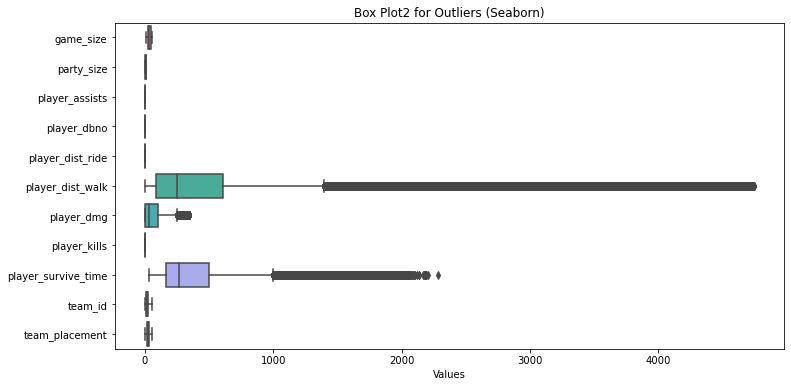

In [71]:
# Creating a box plot for each column to check the outliers using Seaborn for df1
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1_numeric, orient='h')
plt.xlabel('Values')
plt.title('Box Plot2 for Outliers (Seaborn)')
plt.show()

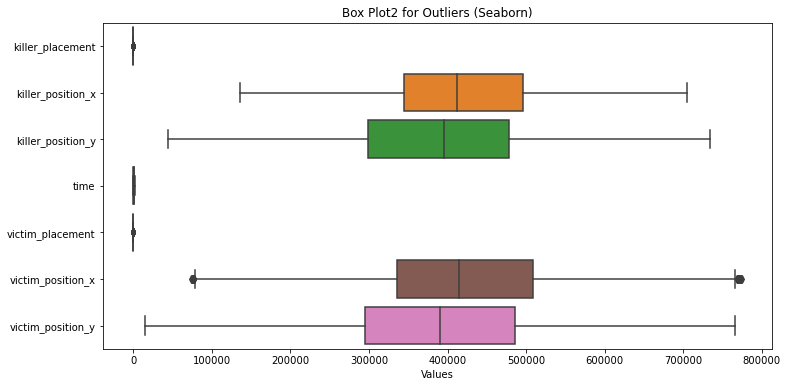

In [72]:
# Creating a box plot for each column to check the outliers using Seaborn for df2
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2_numeric, orient='h')
plt.xlabel('Values')
plt.title('Box Plot2 for Outliers (Seaborn)')
plt.show()

In [21]:
print(df1_numeric.info(),df2_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   game_size            1048575 non-null  int64  
 1   party_size           1048575 non-null  int64  
 2   player_assists       1048575 non-null  int64  
 3   player_dbno          1048575 non-null  int64  
 4   player_dist_ride     1048575 non-null  float64
 5   player_dist_walk     1048575 non-null  float64
 6   player_dmg           1048575 non-null  int64  
 7   player_kills         1048575 non-null  int64  
 8   player_survive_time  1048575 non-null  float64
 9   team_id              1048575 non-null  int64  
 10  team_placement       1048575 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 88.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype 

## > Removing Outliers using IQR
This defines a function remove_outlier to remove outliers from specified numeric columns using the Interquartile Range (IQR) method and then creates horizontal box plots to visualize the cleaned data distribution for selected columns.

Text(0.5, 0, 'Values')

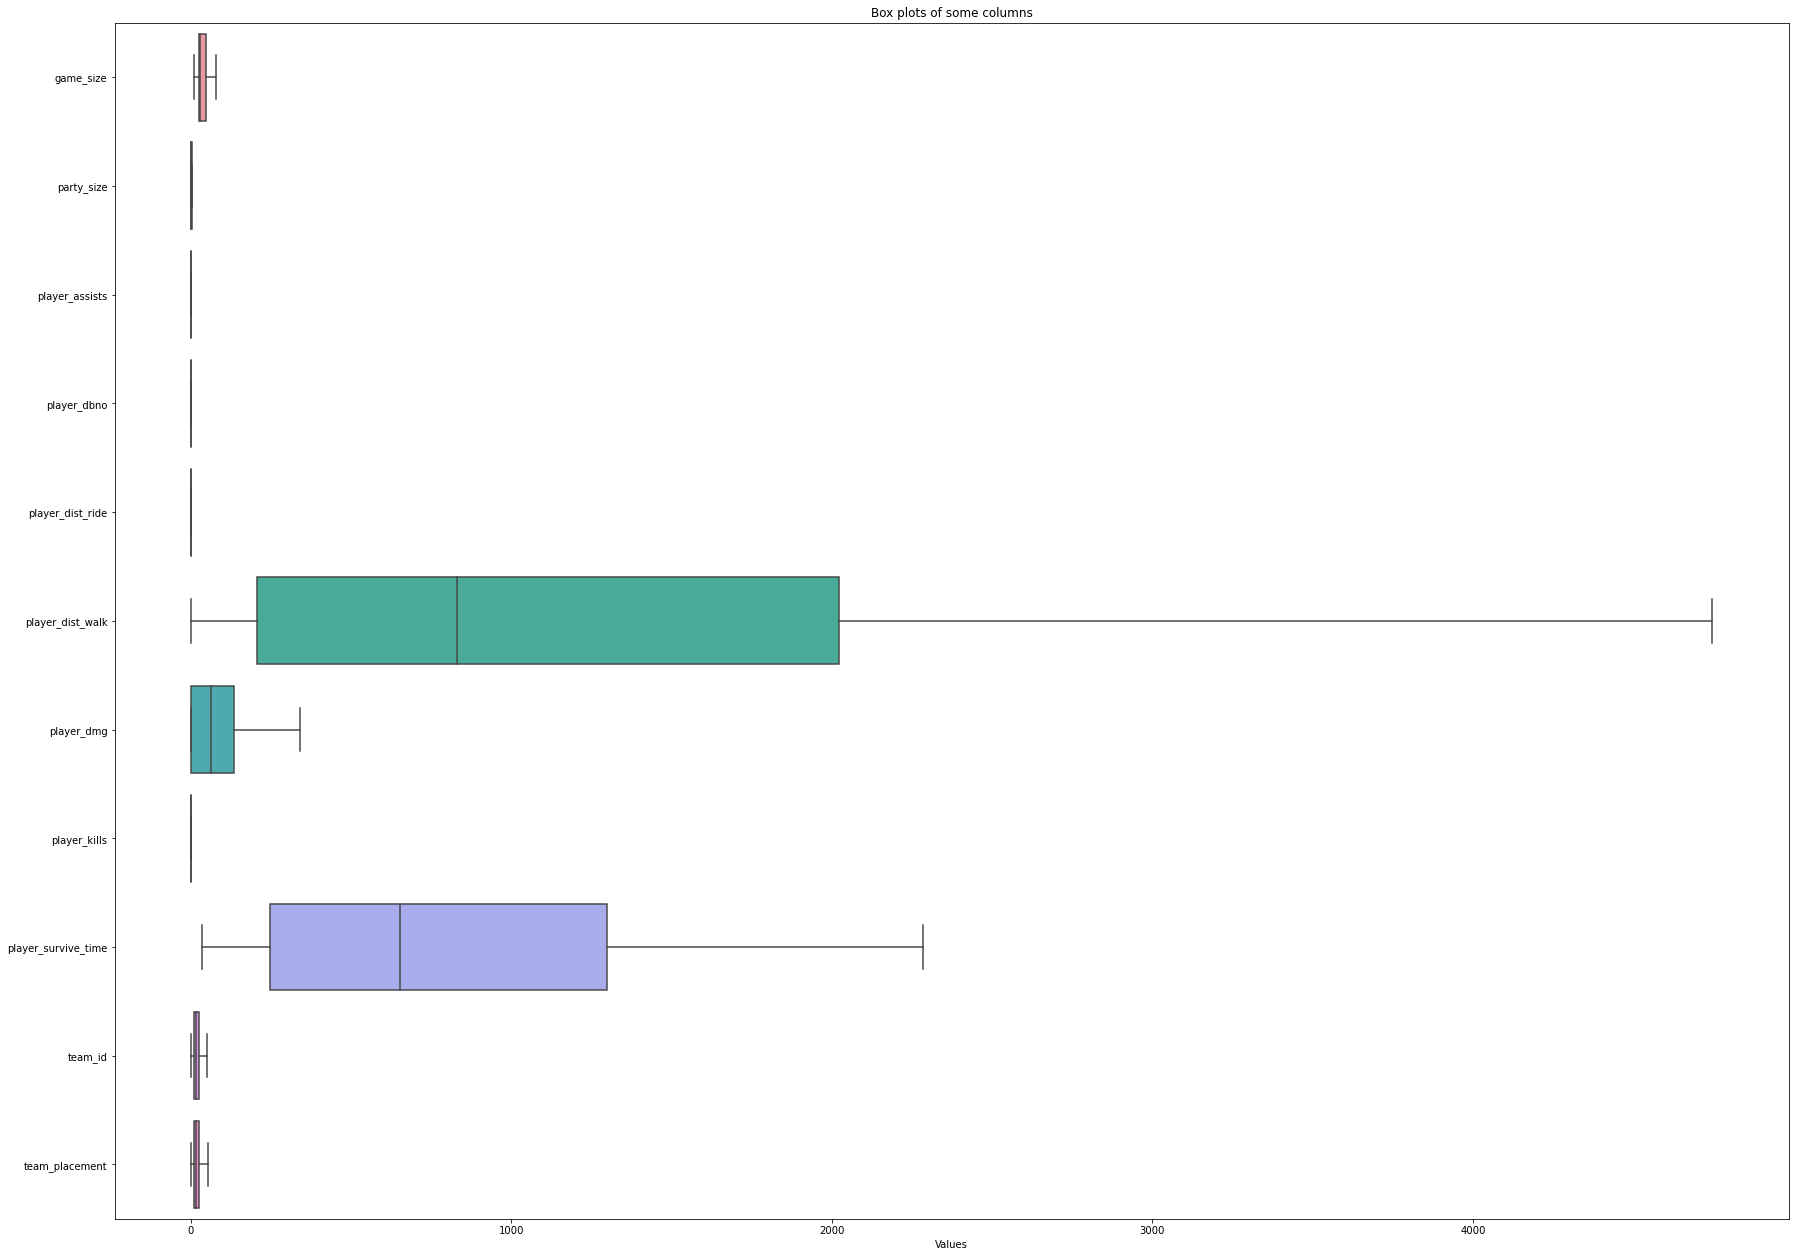

In [22]:
def remove_outlier(data,column,lower_bound=0.25,upper_quartile=0.75):
    q1=data[column].quantile(lower_bound)
    q3=data[column].quantile(upper_quartile)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    return data[(data[column]<=upper_bound) & (data[column]>=lower_bound)]
df1_columns=["game_size","party_size","player_assists","player_dbno","player_dist_ride","player_dist_walk","player_dmg","player_kills","player_survive_time","team_id","team_placement"]
for column in df1_columns:
    df1_numeric=remove_outlier(df1_numeric,df1_columns)
plt.figure(figsize=(30,22))
sns.boxplot(data=df1_numeric,orient='h')
plt.title("Box plots of some columns")
plt.xlabel("Values")

Text(0.5, 0, 'Values')

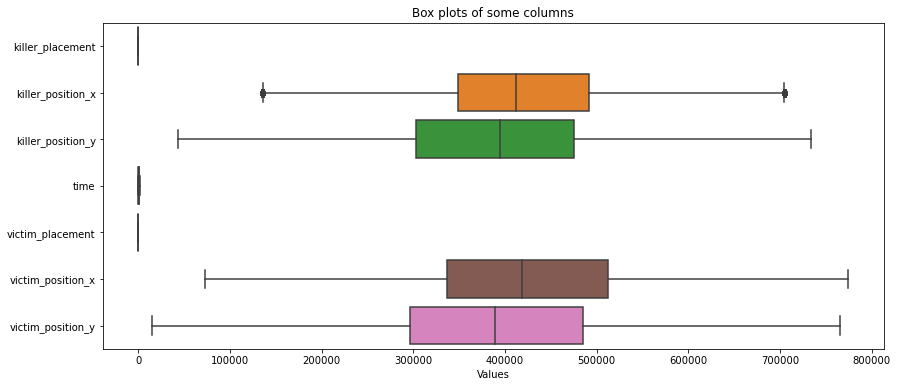

In [23]:
df2_columns=["killer_placement","killer_position_x","killer_position_y","time","victim_placement","victim_position_x","victim_position_y"]
for column in df2_columns:
    df2_numeric=remove_outlier(df2_numeric,df2_columns)
plt.figure(figsize=(14,6))
sns.boxplot(data=df2_numeric,orient='h')
plt.title("Box plots of some columns")
plt.xlabel("Values")

## > Dropping Nan values after Outlier
This code defines a dropna function to remove rows with missing values in specified columns of DataFrames df1_numeric and df2_numeric, and it does so in-place.

In [24]:
def dropna(df,feature):
    df.dropna(subset=feature,inplace=True)
    return df
for column in df1_columns:
    dropna(df1_numeric,column)
for column in df2_columns:
    dropna(df2_numeric,column)

In [25]:
print(df1_numeric.value_counts())
print(df2_numeric.value_counts())

game_size  party_size  player_assists  player_dbno  player_dist_ride  player_dist_walk  player_dmg  player_kills  player_survive_time  team_id  team_placement
11.0       4           0.0             0.0          0.0               42.509160         0.0         0.0           215.423              6.0      9.0               1
47.0       2           0.0             0.0          0.0               27.246477         0.0         0.0           149.427              2.0      44.0              1
                                                                      27.562520         0.0         0.0           76.419               42.0     46.0              1
                                                                      27.502266         0.0         0.0           129.878              8.0      45.0              1
                                                                      27.499258         30.0        0.0           173.932              40.0     27.0              1
                     

In [26]:
df1

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,37.919838,20,0,m3xdave,106.351,100000,88
1,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,292.205048,3457.036130,387,3,UDaddyHere,1690.021,100006,8
2,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,106.215900,0,0,Dummy05,103.415,100010,89
3,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,126.959831,91,0,NA-Wuyifan,272.838,100019,67
4,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,43.346710,0,0,kickinchicken,134.342,100024,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2018-01-04T07:27:37+0000,25,2U4GBNA0YmkrDsQPuOoIrth93iYb2BsiwxiqmTBTZc3Wgh...,tpp,4,0,0,0.000000,3627.102540,0,0,Johnny_Cupcakes,1097.661,5,10
1048571,2018-01-04T07:27:37+0000,25,2U4GBNA0YmkrDsQPuOoIrth93iYb2BsiwxiqmTBTZc3Wgh...,tpp,4,0,0,0.000000,3566.624000,0,0,ClumpyPeriod,1090.514,5,10
1048572,2018-01-04T07:27:37+0000,25,2U4GBNA0YmkrDsQPuOoIrth93iYb2BsiwxiqmTBTZc3Wgh...,tpp,4,0,0,0.000000,3364.916260,0,0,Koalasaurus,1111.324,5,10
1048573,2018-01-04T07:27:37+0000,25,2U4GBNA0YmkrDsQPuOoIrth93iYb2BsiwxiqmTBTZc3Wgh...,tpp,4,0,1,477.003500,630.356934,48,0,firefishethan,464.227,8,14


In [27]:
df1_numeric

,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,team_placement
101,28.0,4,0.0,0.0,0.0,411.564148,0.0,0.0,663.699,2.0,6.0
104,28.0,4,0.0,0.0,0.0,883.485962,124.0,1.0,714.767,4.0,16.0
105,28.0,4,0.0,1.0,0.0,294.410900,100.0,1.0,333.033,4.0,16.0
115,28.0,4,0.0,0.0,0.0,3572.747560,137.0,0.0,1503.592,8.0,5.0
117,28.0,4,0.0,1.0,0.0,72.962555,138.0,0.0,173.752,12.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
1048567,25.0,4,0.0,1.0,0.0,816.728800,105.0,0.0,413.911,2.0,8.0
1048570,25.0,4,0.0,0.0,0.0,3627.102540,0.0,0.0,1097.661,5.0,10.0
1048571,25.0,4,0.0,0.0,0.0,3566.624000,0.0,0.0,1090.514,5.0,10.0
1048572,25.0,4,0.0,0.0,0.0,3364.916260,0.0,0.0,1111.324,5.0,10.0


In [28]:
df2

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,657725.10,146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
3,Down and Out,Weirdo7777,9.0,472014.20,313274.8,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,BlackDpre,13.0,476645.90,316758.4
4,M416,Solayuki1,9.0,473357.80,318340.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Vjolt,13.0,473588.50,318418.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,M416,zzj9806,4.0,567518.40,348603.5,ERANGEL,2U4GBNA0YmnESJa1l16Xwab65aoOy368cl5WBXVNJUJxU0...,1637,BlackLIN000,5.0,563864.90,347265.0
1048571,UMP9,Qu_Jin,8.0,326341.40,389012.3,ERANGEL,2U4GBNA0YmnESJa1l16Xwab65aoOy368cl5WBXVNJUJxU0...,777,EDG-daizem,24.0,326705.90,388790.6
1048572,Vector,liuliuliuxiong,7.0,624622.20,379040.8,ERANGEL,2U4GBNA0YmnESJa1l16Xwab65aoOy368cl5WBXVNJUJxU0...,245,TSXS1122,36.0,624868.10,379809.6
1048573,AKM,crazycyc,17.0,434969.50,443635.7,ERANGEL,2U4GBNA0YmnESJa1l16Xwab65aoOy368cl5WBXVNJUJxU0...,265,WGM-zdcj,24.0,434832.20,443943.1


In [29]:
df2_numeric

,killer_placement,killer_position_x,killer_position_y,time,victim_placement,victim_position_x,victim_position_y
0,5.0,657725.1,146275.2,823,5.0,657725.1,146275.2
3,9.0,472014.2,313274.8,1018,13.0,476645.9,316758.4
4,9.0,473357.8,318340.5,1018,13.0,473588.5,318418.8
6,12.0,376333.8,317858.9,886,15.0,372808.3,297124.2
7,27.0,373125.3,433540.6,137,38.0,373125.8,433608.8
...,...,...,...,...,...,...,...
1048570,4.0,567518.4,348603.5,1637,5.0,563864.9,347265.0
1048571,8.0,326341.4,389012.3,777,24.0,326705.9,388790.6
1048572,7.0,624622.2,379040.8,245,36.0,624868.1,379809.6
1048573,17.0,434969.5,443635.7,265,24.0,434832.2,443943.1


In [30]:
'''counts the number of NaN (missing) values in the "killer_placement" column of two DataFrames, df2_numeric and df2. The first line counts NaN 
values in df2_numeric, while the second line counts NaN values in the original DataFrame df2.'''
print(np.isnan(df2_numeric["killer_placement"]).value_counts())
print(np.isnan(df2["killer_placement"]).value_counts())

False    857719
Name: killer_placement, dtype: int64
False    1048575
Name: killer_placement, dtype: int64


In [31]:
df1["player_dbno"].unique()

array([ 0,  1,  3,  5,  4,  2,  6,  9,  7, 15, 10, 12,  8, 18, 13, 11, 19,
       16, 14, 17, 22, 26, 39, 25, 20, 21, 31, 32, 36, 23, 38, 27, 28, 40,
       41], dtype=int64)

## > FEATURE ENGINEERING AND ENCODING
1. Converting the datatype of columns for the above Data of Aggregate and kill will help in Machine Learning Models for further Analysis and better evaluation of the game.

2. Using Feature Extraction to ungroup the important data from the Feature.

3. Using Encoding methods on the Categorical data to be used for prediction. The Machine Learning Models allows the data to be standardized so the Model perfoamnce is imrpoved by Scled data which has zero mean and unit variance.

4. Feature Selection helps in selecting the Features  and using those Features we can extract insights which can be used for further Analysis or Machine Learning Models.

In [32]:
df1["date"]=pd.to_datetime(df1["date"])

In [33]:
# Using one hot encoding for Map to convert to numerical
df2["map"].replace(["ERANGEL","MIRAMAR"],[0,1],inplace=True)
# Using Feature Engineering to Normalise the data
df2_numeric["killer_placement"]=df2_numeric["killer_placement"].astype(int)
df2_numeric["victim_placement"]=df2_numeric["victim_placement"].astype(int)
df1["match_mode"].replace("tpp",0,inplace=True)
# Using Feature Exctraction for ungrouping data and creating new Features
df1["year"]=df1["date"].dt.year
df1["month"]=df1["date"].dt.month
df1["Date"]=df1["date"].dt.date
df1_numeric["game_size"]=df1_numeric["game_size"].astype(int)
df1_numeric["player_assists"]=df1_numeric["player_assists"].astype(int)
df1_numeric["player_dbno"]=df1_numeric["player_dbno"].astype(int)
df1_numeric["player_dmg"]=df1_numeric["player_dmg"].astype(int)
df1_numeric["team_id"]=df1_numeric["team_id"].astype(int)

In [34]:
df1["player_kills"].unique()

array([ 0,  3,  2,  1,  5,  9,  4,  7, 10,  8,  6, 18, 15, 12, 13, 30, 14,
       11, 16, 19, 17, 24, 20, 22, 25, 38, 32, 23, 46, 29, 21, 33, 45, 51,
       28, 27, 31, 26, 42, 35, 36, 41, 37, 39, 52], dtype=int64)

## > GAME TIME ANALYSIS AND VISUALIZATIONS


In [73]:
import random
import pandas as pd

# Set the seed for reproducibility
random.seed(100615)

# Read data1 and create a backup
data1 = pd.read_csv("agg_match_stats_1.csv")
data1_backup = data1.copy()

# Sample 100,000 rows without replacement
data1 = data1.sample(n=100000, replace=False)

# Read data2 and create a backup
data2 = pd.read_csv("kill_match_stats_final_1.csv")
data2_backup = data2.copy()

# Sample 100,000 rows without replacement
data2 = data2.sample(n=100000, replace=False)

In [74]:
# Remove rows with missing values (NA)
data1.dropna(inplace=True)
data2.dropna(inplace=True)

# Filter rows where 'map' column is not empty
data2 = data2[data2['map'].notna()]

# Remove the 4th column from data1
data1.drop(data1.columns[3], axis=1, inplace=True)

# Create a DataFrame to count occurrences of 'match_id' in data1
match_id = pd.DataFrame(data1['match_id'].value_counts().reset_index())
match_id.columns = ['Var1', 'Count']

# Create a DataFrame to count occurrences of 'player_name' in data1
id1 = pd.DataFrame(data1['player_name'].value_counts().reset_index())
id1.columns = ['Var1', 'Count']

# Create a DataFrame to count occurrences of 'match_id' in data2
match_id2 = pd.DataFrame(data2['match_id'].value_counts().reset_index())
match_id2.columns = ['Var1', 'Count']

# Create a DataFrame to count occurrences of 'victim_name' in data2
id_victim = pd.DataFrame(data2['victim_name'].value_counts().reset_index())
id_victim.columns = ['Var1', 'Count']

# Calculate the lengths
len_match_id = len(match_id)
len_id1 = len(id1)
len_match_id2 = len(match_id2)
len_id_victim = len(id_victim)

print(len_match_id)
print(len_id1)
print(len_match_id2)
print(len_id_victim)


73078
96671
67294
86981


In [75]:
# Extract day and time columns from the 'date' column in data1
data1['day'] = data1['date'].str[:10]
data1['time'] = data1['date'].str[11:19]

# Remove the original 'date' column from data1
data1 = data1.drop(columns=['date'])

miramar = data2[data2['map'] == 'MIRAMAR']
erangel = data2[data2['map'] == 'ERANGEL']

lastkill = data2[(data2['killer_placement'] == 1) & (data2['victim_placement'] == 2)]

data1['day'] = pd.to_datetime(data1['day'])
day = pd.DataFrame(data1['day'].value_counts()).reset_index()
day.columns = ['day', 'count']


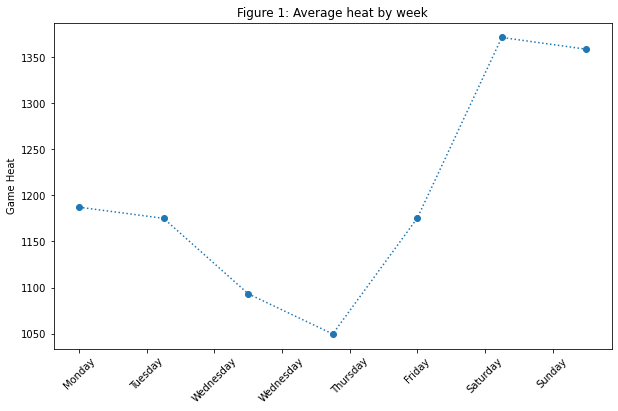

In [77]:
import matplotlib.pyplot as plt

# Calculate the weekday and create 'week' DataFrame
day['weekday'] = day['day'].dt.strftime('%A')
week = day['weekday'].value_counts().reset_index()
week.columns = ['weekday', 'freq']

# Calculate the sum of 'Freq' by weekday
sum_by_weekday = day.groupby('weekday')['count'].sum().reset_index()
sum_by_weekday.columns = ['weekday', 'Freq']

# Merge 'sum_by_weekday' and 'week' DataFrames
week = pd.merge(sum_by_weekday, week, on='weekday')

# Calculate the average 'Game Heat'
week['aver'] = week['Freq'] / week['freq']

# Define the order of weekdays
week['weekday'] = pd.Categorical(week['weekday'], ordered=True, categories=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Sort the DataFrame by weekday
week = week.sort_values(by='weekday').reset_index(drop=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(week['weekday'], week['aver'], linestyle='dotted', marker='o')
plt.title('Figure 1: Average heat by week')
plt.xlabel('')
plt.ylabel('Game Heat')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both'))
plt.show()


C:\Users\being\AppData\Local\Temp\ipykernel_23396\2092925683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logintime['weekday'] = logintime['day'].dt.strftime('%A')
C:\Users\being\AppData\Local\Temp\ipykernel_23396\2092925683.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logintime['time'] = logintime['time'].apply(timeHM_formatter)
C:\Users\being\AppData\Local\Temp\ipykernel_23396\2092925683.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

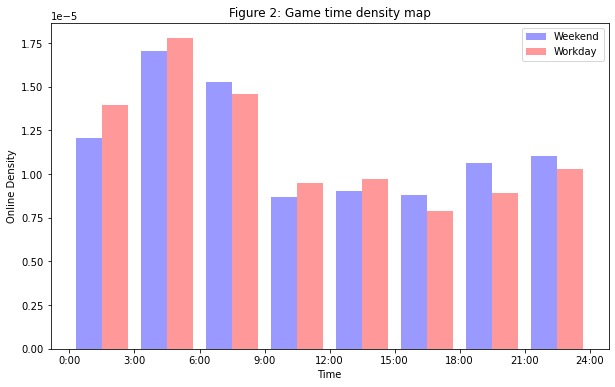

In [78]:
# Extract 'day' and 'time' columns from 'data1'
logintime = data1[['day', 'time']]

# Calculate the weekday
logintime['weekday'] = logintime['day'].dt.strftime('%A')

# Define a function to convert time to seconds
def timeHM_formatter(x):
    h = int(x[:2])
    m = int(x[3:5])
    s = int(x[6:8])
    return 3600 * h + 60 * m + s

# Apply the timeHM_formatter function to 'time' column
logintime['time'] = logintime['time'].apply(timeHM_formatter)

# Define 'week' column based on weekdays
logintime['week'] = logintime['weekday'].apply(lambda x: 'Weekend' if x in ["Saturday", "Sunday"] else 'Workday')

# Plot the data
plt.figure(figsize=(10, 6))
plt.hist([logintime[logintime['week'] == 'Weekend']['time'], logintime[logintime['week'] == 'Workday']['time']],
         bins=8, alpha=0.4, color=['blue', 'red'], label=['Weekend', 'Workday'], density=True)
plt.xlabel('Time')
plt.ylabel('Online Density')
plt.title('Figure 2: Game time density map')
plt.legend()
plt.xticks([10800 * i for i in range(9)], ["0:00", "3:00", "6:00", "9:00", "12:00", "15:00", "18:00", "21:00", "24:00"])
plt.show()


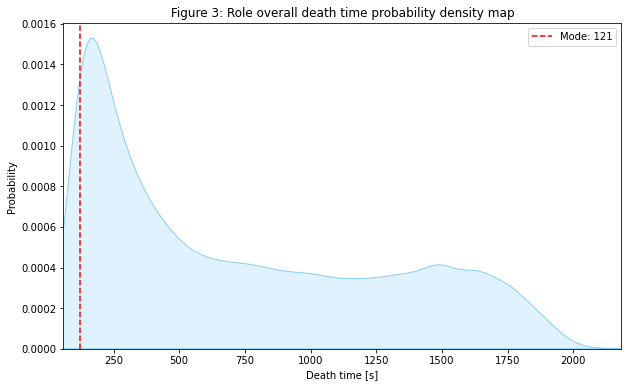

In [79]:
import seaborn as sns

# Define the zhongshu function
def zhongshu(x):
    return pd.to_numeric(x.value_counts().idxmax())

# Convert 'time' column to numeric
data2['time'] = pd.to_numeric(data2['time'])

# Get the range of 'time' column
time_range = data2['time'].min(), data2['time'].max()

# Calculate the mode of 'time' column using zhongshu function
mode_time = zhongshu(data2['time'])

# Create a density heatmap
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data2, x='time', fill=True, color='#87CEFA')
plt.xlabel('Death time [s]')
plt.ylabel('Probability')
plt.title('Figure 3: Role overall death time probability density map')
plt.axvline(mode_time, color='red', linestyle='--', label=f'Mode: {mode_time}')
plt.legend()
plt.xlim(time_range)
plt.show()


C:\Users\being\AppData\Local\Temp\ipykernel_23396\3208420326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erangel['time'] = pd.to_numeric(erangel['time'])
C:\Users\being\AppData\Local\Temp\ipykernel_23396\3208420326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miramar['time'] = pd.to_numeric(miramar['time'])


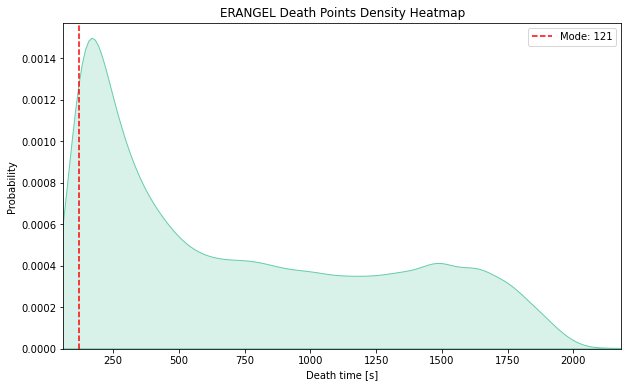

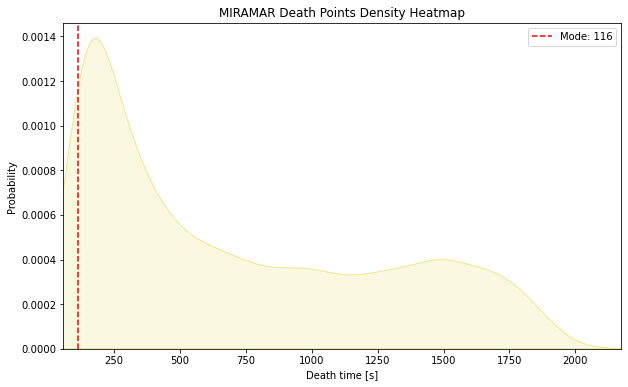

In [80]:
# Define the zhongshu function
def zhongshu(x):
    return pd.to_numeric(x.value_counts().idxmax())

# Convert 'time' column to numeric for ERANGEL and MIRAMAR DataFrames
erangel['time'] = pd.to_numeric(erangel['time'])
miramar['time'] = pd.to_numeric(miramar['time'])

# Get the range and mode of 'time' column for ERANGEL
erangel_time_range = erangel['time'].min(), erangel['time'].max()
erangel_mode_time = zhongshu(erangel['time'])

# Get the range and mode of 'time' column for MIRAMAR
miramar_time_range = miramar['time'].min(), miramar['time'].max()
miramar_mode_time = zhongshu(miramar['time'])

# Create a density heatmap for ERANGEL
plt.figure(figsize=(10, 6))
sns.kdeplot(data=erangel, x='time', fill=True, color='#66CDAA')
plt.xlabel('Death time [s]')
plt.ylabel('Probability')
plt.title('ERANGEL Death Points Density Heatmap')
plt.axvline(erangel_mode_time, color='red', linestyle='--', label=f'Mode: {erangel_mode_time}')
plt.legend()
plt.xlim(erangel_time_range)
plt.show()

# Create a density heatmap for MIRAMAR
plt.figure(figsize=(10, 6))
sns.kdeplot(data=miramar, x='time', fill=True, color='#F0E68C')
plt.xlabel('Death time [s]')
plt.ylabel('Probability')
plt.title('MIRAMAR Death Points Density Heatmap')
plt.axvline(miramar_mode_time, color='red', linestyle='--', label=f'Mode: {miramar_mode_time}')
plt.legend()
plt.xlim(miramar_time_range)
plt.show()


**Skydiving position preference**

c:\Users\being\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


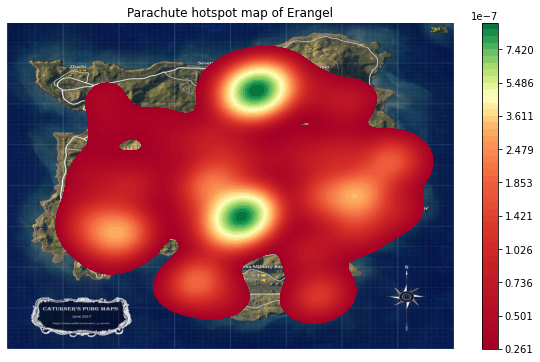

c:\Users\being\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


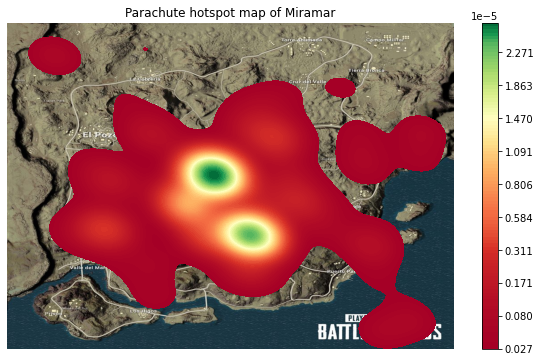

In [81]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Filter 'erangel' and 'miramar' DataFrames for times within 61-121s and 62-122s, respectively
era_landing = erangel[(erangel['time'] >= 61) & (erangel['time'] <= 121)].copy()
mir_landing = miramar[(miramar['time'] >= 62) & (miramar['time'] <= 122)].copy()

# Scale columns 4, 5, 11, and 12 for 'era_landing' and 'mir_landing'
scaling_factor_erangel = 4096 / 800000
scaling_factor_miramar = 1000 / 800000

era_landing.iloc[:, [3, 4, 10, 11]] *= scaling_factor_erangel
mir_landing.iloc[:, [3, 4, 10, 11]] *= scaling_factor_miramar

# Load map images
erangel_map = plt.imread("erangel.jpg")
miramar_map = plt.imread("miramar.jpg")

# Get dimensions of 'era_landing' and 'mir_landing' DataFrames
era_landing_dimensions = era_landing.shape[0]
mir_landing_dimensions = mir_landing.shape[0]

# Define a function to plot the heatmap with a map background
def plot_heatmap_with_map(df, map_image, title, xlim, ylim, bins, map_width, map_height):
    plt.figure(figsize=(10, 6))
    
    # Plot the map background
    plt.imshow(map_image, extent=[0, map_width, 0, map_height], aspect='auto')
    
    # Scatter plot of killer positions
    plt.scatter(df['killer_position_x'], df['killer_position_y'], c='lightgreen', s=0.1, edgecolors='none', alpha=0.5)
    
    # Create a 2D density plot with lighter density
    sns.kdeplot(data=df, x='killer_position_x', y='killer_position_y', cmap='RdYlGn', shade=True, cbar=True, levels=bins, shade_lowest=False)
    
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.axis('off')
    
    plt.show()

# Plot the heatmap for Erangel
plot_heatmap_with_map(era_landing, erangel_map, "Parachute hotspot map of Erangel", [0, 4096], [4096, 0], 50, 4096, 4096)

# Plot the heatmap for Miramar
plot_heatmap_with_map(mir_landing, miramar_map, "Parachute hotspot map of Miramar", [0, 1000], [1000, 0], 100, 1000, 1000)


**Player mode preference**

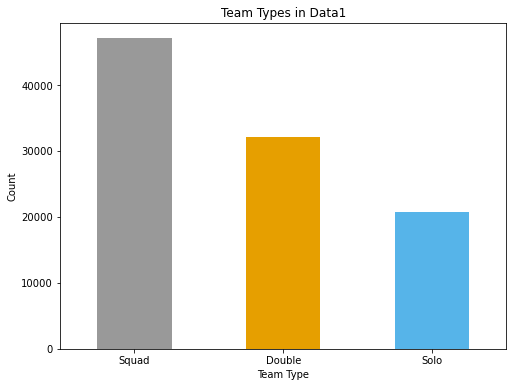

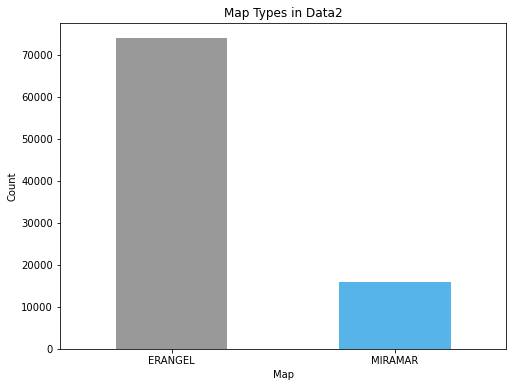

In [82]:
# Create a new column 'team' based on 'party_size'
data1['team'] = data1['party_size'].apply(lambda x: 'Solo' if x == 1 else 'Double' if x == 2 else 'Squad')

# Plot the bar chart for 'data1'
plt.figure(figsize=(8, 6))
data1['team'].value_counts().plot(kind='bar', color=['#999999', '#E69F00', '#56B4E9'])
plt.xlabel('Team Type')
plt.ylabel('Count')
plt.title('Team Types in Data1')
plt.xticks(rotation=0)
plt.text(0, max(data1['team'].value_counts()) + 20, data1['team'].value_counts()['Solo'], ha='center', va='bottom', color='white', fontsize=12)
plt.text(1, max(data1['team'].value_counts()) + 20, data1['team'].value_counts()['Double'], ha='center', va='bottom', color='white', fontsize=12)
plt.text(2, max(data1['team'].value_counts()) + 20, data1['team'].value_counts()['Squad'], ha='center', va='bottom', color='white', fontsize=12)
plt.show()

# Plot the bar chart for 'data2'
plt.figure(figsize=(8, 6))
data2['map'].value_counts().plot(kind='bar', color=['#999999', '#56B4E9'])
plt.xlabel('Map')
plt.ylabel('Count')
plt.title('Map Types in Data2')
plt.xticks(rotation=0)
plt.text(0, max(data2['map'].value_counts()) + 20, data2['map'].value_counts()['ERANGEL'], ha='center', va='bottom', color='white', fontsize=12)
plt.text(1, max(data2['map'].value_counts()) + 20, data2['map'].value_counts()['MIRAMAR'], ha='center', va='bottom', color='white', fontsize=12)
plt.show()


**Firearms analysis**

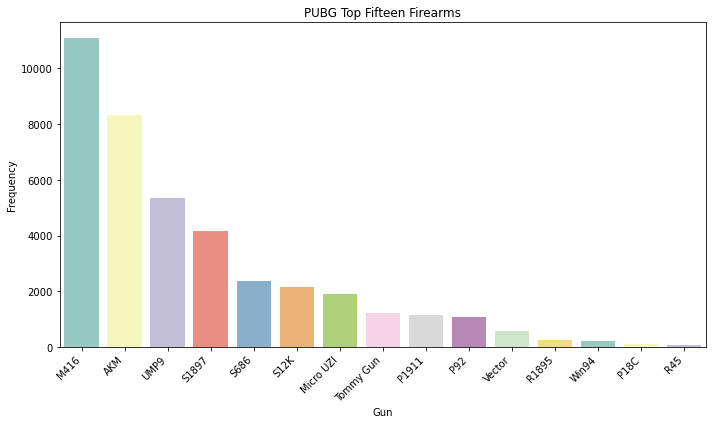

In [83]:
# Create a DataFrame to count the occurrences of each weapon
weapon_counts = data2['killed_by'].value_counts().reset_index()
weapon_counts.columns = ['gun', 'Freq']

# Filter for the top fifteen firearms
top_fifteen_guns = weapon_counts.loc[weapon_counts['gun'].isin(['P18C', 'P1911', 'P92', 'R1895', 'R45', 'Win94', 'S1897', 'S686', 'S12K', 'UMP9', 'Micro UZI', 'Vector', 'Tommy Gun', 'AKM', 'M416'])]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='gun', y='Freq', data=top_fifteen_guns, palette='Set3')
plt.xlabel('Gun')
plt.ylabel('Frequency')
plt.title('PUBG Top Fifteen Firearms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Kill distance**

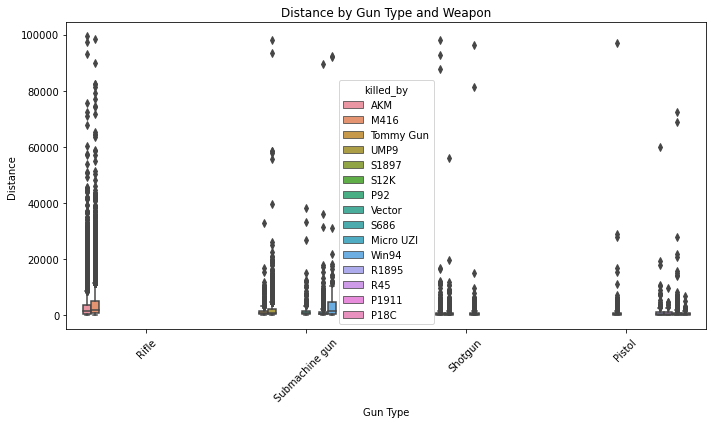

In [84]:
# Filter out rows where victim and killer positions are not zero
data3 = data2[(data2['victim_position_x'] != 0) & (data2['victim_position_y'] != 0) & (data2['killer_position_x'] != 0) & (data2['killer_position_y'] != 0)].copy()

# Calculate the distance
data3['distance'] = ((data3['killer_position_x'] - data3['victim_position_x']) ** 2 + (data3['killer_position_y'] - data3['victim_position_y']) ** 2) ** 0.5

# Subset data for the top fifteen guns
data4 = data3[data3['killed_by'].isin(top_fifteen_guns['gun'])].copy()

# Create a new column 'guntype' based on 'killed_by'
data4.loc[data4['killed_by'].isin(['AKM', 'M416', 'SCAR-L', 'M16A4']), 'guntype'] = 'Rifle'
data4.loc[data4['killed_by'].isin(['P18C', 'P1911', 'P92', 'R1895', 'R45']), 'guntype'] = 'Pistol'
data4.loc[data4['killed_by'].isin(['S1897', 'S686', 'S12K']), 'guntype'] = 'Shotgun'
data4.loc[data4['killed_by'].isin(['Kar98k', 'M24', 'AWM']), 'guntype'] = 'Sniper rifle1'
data4.loc[data4['killed_by'].isin(['Mini 14', 'SKS']), 'guntype'] = 'Sniper rifle2'
data4['guntype'].fillna('Submachine gun', inplace=True)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='guntype', y='distance', hue='killed_by', data=data4)
plt.xlabel('Gun Type')
plt.ylabel('Distance')
plt.title('Distance by Gun Type and Weapon')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Team size factor**

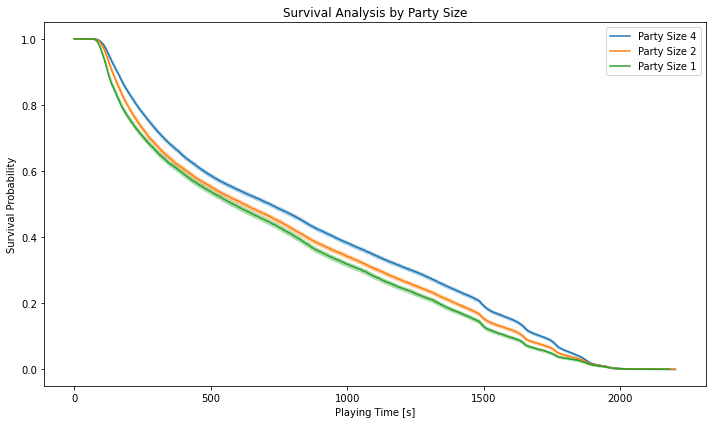

In [85]:
from lifelines import KaplanMeierFitter

# Get unique party sizes
party_sizes = data1['party_size'].unique()

# Create a Kaplan-Meier estimator for each party size and plot them together
plt.figure(figsize=(10, 6))
for party_size in party_sizes:
    subset_data = data1[data1['party_size'] == party_size]
    durations = subset_data['player_survive_time']
    event_observed = subset_data['party_size'].apply(lambda x: 1 if x == party_size else 0)  # Create binary event_observed for the specific party size
    kmf = KaplanMeierFitter()
    kmf.fit(durations, event_observed=event_observed)
    kmf.plot(label=f'Party Size {party_size}')

# Customize the plot
plt.xlabel('Playing Time [s]')
plt.ylabel('Survival Probability')
plt.title('Survival Analysis by Party Size')
plt.legend()
plt.tight_layout()
plt.show()


## MODEL BUILDING

## > FINAL TEAM PLACEMENT
The code employs a Gradient Boosting Regressor to predict player team placements using training data. It then evaluates predictions on test data using Mean Squared Error (MSE) and R-squared (R2) for performance assessment. Gradient Boosting is chosen for its regression capabilities, handling of complex relationships, ensemble learning, and resistance to overfitting, making it a suitable choice for predicting player rankings.

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming df1 contains the dataset

X = df1[['player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk', 'player_dmg', 'player_kills', 'player_survive_time']]
y = df1['team_placement']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

print(model_gb.score(X_train,y_train))
# Predict the player's final ranking using the Gradient Boosting Regressor model
y_pred_gb = model_gb.predict(X_test)

# Evaluate the Gradient Boosting model
print('Mean squared error (Gradient Boosting):', mean_squared_error(y_test, y_pred_gb))
print('R-squared (Gradient Boosting):', r2_score(y_test, y_pred_gb))

0.5397951345638996
Mean squared error (Gradient Boosting): 193.50009288984097
R-squared (Gradient Boosting): 0.5383772010174384


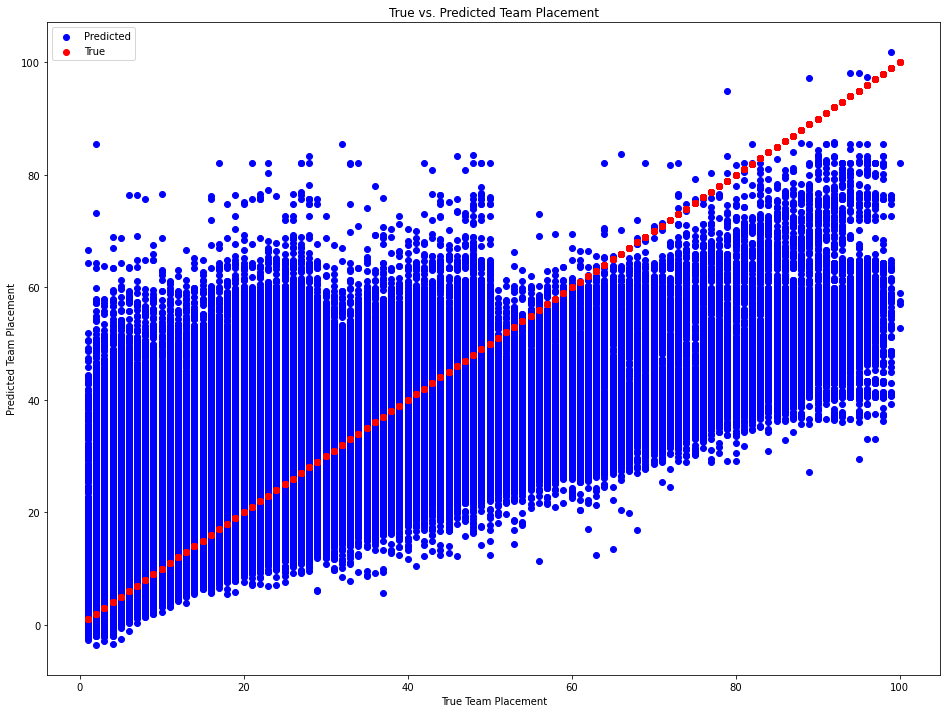

In [87]:
# Visualize true vs. predicted values using a scatter plot
plt.figure(figsize=(16,12))
plt.scatter(y_test, y_pred_gb, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='True')  # Overlay true values
plt.xlabel('True Team Placement')
plt.ylabel('Predicted Team Placement')
plt.title('True vs. Predicted Team Placement')
plt.legend()
plt.show()


## > IDENTIFYING PLAYER HOTSPOT LOCATIONS ON MAP
KMeans is employed to group player positions on a game map into clusters based on their coordinates. This facilitates the identification of areas where players are concentrated, revealing potential hotspots or high-activity zones. By using KMeans clustering, the code can visualize and analyze player hotspots on the map, offering valuable insights for game strategy and decision-making. In essence, KMeans is used for clustering player positions, aiding the analysis and visualization of player activity patterns on the map.

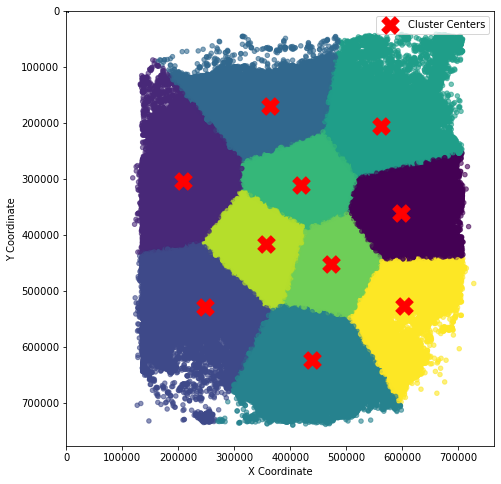

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load the map image (replace 'map_image_path' with your local map image path)
map_image_path = 'erangel.jpg'
map_img = mpimg.imread(map_image_path)

# Assuming df2_numeric contains the dataset
# Let's assume you have a DataFrame named df2_numeric

# Extracting player positions
X = df2_numeric[['victim_position_x', 'victim_position_y', 'killer_position_x', 'killer_position_y']]

# Combine x and y coordinates
y_x = (X['victim_position_x'] + X['killer_position_x']) / 2
y_y = (X['victim_position_y'] + X['killer_position_y']) / 2

# Stack the y coordinates horizontally
y = np.column_stack((y_x, y_y))

# Use KMeans to cluster the data into 10 hotspots (you can adjust this number)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(y)
y_kmeans = kmeans.predict(y)

# Function to overlay points on the map image
def overlay_points_on_map_kmeans(map_img, x, y, kmeans, color_map='viridis', label='Points'):
    plt.figure(figsize=(10, 8))
    plt.imshow(map_img)
    plt.scatter(x, y, s=20, c=kmeans.predict(np.column_stack((x, y))), cmap=color_map, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

# Overlay points using KMeans clusters
overlay_points_on_map_kmeans(map_img, y_x, y_y, kmeans, label='Clustered Points')

## > LOGISTIC REGRESSION FOR CHICKEN DINNER
The model interpretation provided discusses the influence of different variables on the probability of winning or "CHICKEN DINNER" in a gaming context, as predicted by the logistic regression model.

In [89]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# Remove outliers
df1 = df1[(df1['team_placement'] > 0) & (df1['team_placement'] < 100)]
# Create a new column for the victory variable
df1['victory'] = np.where(df1['team_placement'] == 1, 1, 0)
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1[['player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk', 'player_dmg', 'player_kills', 'player_survive_time']], df1['victory'], test_size=0.25)
# Create a logistic regression model
model = LogisticRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
print("Model Score",model.score(X_train,y_train))
# Make predictions on the test set
y_pred = model.predict_proba(X_test)[:, 1]
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred > 0.683)
# Calculate the TPR
tpr = cm[1, 1] / sum(cm[1, :])
# Calculate the FPR
fpr = cm[0, 1] / sum(cm[0, :])
# Calculate the accuracy
accuracy = sum(cm.diagonal()) / sum(cm)
# Print the results
print('True positive rate:', tpr)
print('False positive rate:', fpr)
print('Accuracy:', accuracy)

Model Score 0.9730796521845284
True positive rate: 0.1364744110479285
False positive rate: 0.0024966044609140083
Accuracy: [  0.97938485 155.18126521]


c:\Users\being\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## > ROC CURVE
The coverage area of the ROC curve (ie, the AUC value) is 0.961 which is very close to 1, indicating that the classification effect of the model is very good. The figure shows that the optimal threshold is 0.683, and the calculated positive probability value is greater than 0.683, which is predicted to be a positive example. Conversely, the prediction is a counterexample. The figure shows that 93.7% of the positive examples in the training set are correctly predicted under this threshold criterion, while 92.6% of the counterexamples are correctly predicted, and the overall accuracy is high.

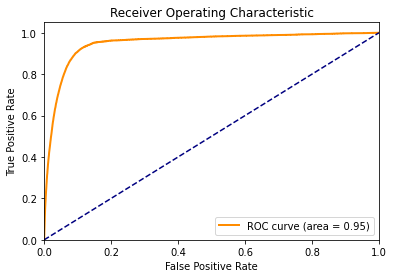

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Get the ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## > CONCLUSION
The overall prediction accuracy is 97.88%. The generalization performance of the visible model is good, there is no over-fitting, it is effective Classifier. This also proves that the analysis of the factors affecting whether or not to eat chicken dinner is accurate and practical